# Recommendation System - Model 1

## Import packages and dataframes

In [1]:
import numpy as np
import pandas as pd
import random as rd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder as OHE
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

rd.seed(123)

In [2]:
# import all the files

donationsDF = pd.read_csv('Donations.csv')
donorsDF = pd.read_csv('Donors.csv')
projectsDF = pd.read_csv('Projects.csv')
schoolsDF = pd.read_csv('Schools.csv')
resourcesDF = pd.read_csv('Resources.csv')

/Users/prastha/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Snapshot of the dataframes

In [3]:
donationsDF.head()

,Project ID,Donation ID,Donor ID,Donation Included Optional Donation,Donation Amount,Donor Cart Sequence,Donation Received Date
0,000009891526c0ade7180f8423792063,688729120858666221208529ee3fc18e,1f4b5b6e68445c6c4a0509b3aca93f38,No,178.37,11,2016-08-23 13:15:57
1,000009891526c0ade7180f8423792063,dcf1071da3aa3561f91ac689d1f73dee,4aaab6d244bf3599682239ed5591af8a,Yes,25.00,2,2016-06-06 20:05:23
2,000009891526c0ade7180f8423792063,18a234b9d1e538c431761d521ea7799d,0b0765dc9c759adc48a07688ba25e94e,Yes,20.00,3,2016-06-06 14:08:46
3,000009891526c0ade7180f8423792063,38d2744bf9138b0b57ed581c76c0e2da,377944ad61f72d800b25ec1862aec363,Yes,25.00,1,2016-05-15 10:23:04
4,000009891526c0ade7180f8423792063,5a032791e31167a70206bfb86fb60035,6d5b22d39e68c656071a842732c63a0c,Yes,25.00,2,2016-05-17 01:23:38


In [4]:
donorsDF.head()

,Donor ID,Donor City,Donor State,Donor Is Teacher,Donor Zip
0,00000ce845c00cbf0686c992fc369df4,Evanston,Illinois,No,602
1,00002783bc5d108510f3f9666c8b1edd,Appomattox,other,No,245
2,00002d44003ed46b066607c5455a999a,Winton,California,Yes,953
3,00002eb25d60a09c318efbd0797bffb5,Indianapolis,Indiana,No,462
4,0000300773fe015f870914b42528541b,Paterson,New Jersey,No,075


In [5]:
projectsDF.head()

,Project ID,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Essay,Project Short Description,Project Need Statement,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,Project Expiration Date,Project Current Status,Project Fully Funded Date
0,7685f0265a19d7b52a470ee4bac883ba,e180c7424cb9c68cb49f141b092a988f,4ee5200e89d9e2998ec8baad8a3c5968,25,Teacher-Led,Stand Up to Bullying: Together We Can!,Did you know that 1-7 students in grades K-12 ...,Did you know that 1-7 students in grades K-12 ...,"My students need 25 copies of ""Bullying in Sch...",Applied Learning,"Character Education, Early Development",Grades PreK-2,Technology,361.80,2013-01-01,2013-05-30,Fully Funded,2013-01-11
1,f9f4af7099061fb4bf44642a03e5c331,08b20f1e2125103ed7aa17e8d76c71d4,cca2d1d277fb4adb50147b49cdc3b156,3,Teacher-Led,Learning in Color!,"Help us have a fun, interactive listening cent...","Help us have a fun, interactive listening cent...","My students need a listening center, read alon...","Applied Learning, Literacy & Language","Early Development, Literacy",Grades PreK-2,Technology,512.85,2013-01-01,2013-05-31,Expired,NaN
2,afd99a01739ad5557b51b1ba0174e832,1287f5128b1f36bf8434e5705a7cc04d,6c5bd0d4f20547a001628aefd71de89e,1,Teacher-Led,Help Second Grade ESL Students Develop Languag...,Visiting or moving to a new place can be very ...,Visiting or moving to a new place can be very ...,My students need beginning vocabulary audio ca...,Literacy & Language,ESL,Grades PreK-2,Supplies,435.92,2013-01-01,2013-05-30,Fully Funded,2013-05-22
3,c614a38bb1a5e68e2ae6ad9d94bb2492,900fec9cd7a3188acbc90586a09584ef,8ed6f8181d092a8f4c008b18d18e54ad,40,Teacher-Led,Help Bilingual Students Strengthen Reading Com...,Students at our school are still working hard ...,Students at our school are still working hard ...,My students need one copy of each book in The ...,Literacy & Language,"ESL, Literacy",Grades 3-5,Books,161.26,2013-01-01,2013-05-31,Fully Funded,2013-02-06
4,ec82a697fab916c0db0cdad746338df9,3b200e7fe3e6dde3c169c02e5fb5ae86,893173d62775f8be7c30bf4220ad0c33,2,Teacher-Led,Help Us Make Each Minute Count!,"""Idle hands"" were something that Issac Watts s...","""Idle hands"" were something that Issac Watts s...","My students need items such as Velcro, two pou...",Special Needs,Special Needs,Grades 3-5,Supplies,264.19,2013-01-01,2013-05-30,Fully Funded,2013-01-01


In [6]:
resourcesDF.head()

,Project ID,Resource Item Name,Resource Quantity,Resource Unit Price,Resource Vendor Name
0,000009891526c0ade7180f8423792063,chair move and store cart,1.0,350.00,NaN
1,00000ce845c00cbf0686c992fc369df4,sony mdr zx100 blk headphones,40.0,12.86,CDW-G
2,00002d44003ed46b066607c5455a999a,"gaiam kids stay-n-play balance ball, grey",4.0,19.00,Amazon Business
3,00002d44003ed46b066607c5455a999a,cf520x - giant comfy pillows - set of 4,1.0,269.00,Lakeshore Learning Materials
4,00002d44003ed46b066607c5455a999a,"serta lounger, mini, sky blue",1.0,131.85,Amazon Business


## Data Cleaning: Remove one-time donors

In [7]:
donorsDF_merged = donorsDF.merge(donationsDF, on = 'Donor ID', how = 'inner') # donation ID is the primary key here

In [8]:
donorsDF_merged.head()

,Donor ID,Donor City,Donor State,Donor Is Teacher,Donor Zip,Project ID,Donation ID,Donation Included Optional Donation,Donation Amount,Donor Cart Sequence,Donation Received Date
0,00000ce845c00cbf0686c992fc369df4,Evanston,Illinois,No,602,5bab6101eed588c396a59f6bd64274b6,598691d82438952e2e4f3ed50531fd2a,Yes,50.00,1,2013-12-17 21:47:14
1,00002783bc5d108510f3f9666c8b1edd,Appomattox,other,No,245,9db61b1b1e43a7b256eec9b20b42d854,024a4665bdb59f32027395aea3b0ed55,Yes,99.00,1,2016-02-02 18:34:27
2,00002d44003ed46b066607c5455a999a,Winton,California,Yes,953,2f53e5f31890e647048ac217cda3b83f,7831f66a25935db8b7424170355edabf,No,26.00,10,2017-05-02 12:34:09
3,00002d44003ed46b066607c5455a999a,Winton,California,Yes,953,2f53e5f31890e647048ac217cda3b83f,ee15bb7f179142fdff3f24cff8e88483,No,100.00,9,2017-04-01 01:08:50
4,00002d44003ed46b066607c5455a999a,Winton,California,Yes,953,2f7996f08052785e9b146f72c0c4990d,c73207489356a7bcf3ef0b8660c61b04,Yes,13.75,5,2017-01-16 15:46:57


In [9]:
# Get the count of donations a donor has made
df_temp1 = donorsDF_merged.groupby(['Donor ID']).size().reset_index(name='Num Donations')

df_temp1.head(2)

,Donor ID,Num Donations
0,00000ce845c00cbf0686c992fc369df4,1
1,00002783bc5d108510f3f9666c8b1edd,1


In [10]:
df_temp2 = df_temp1[df_temp1['Num Donations'] > 1] # removing all the single-donors

print("We got rid of %d single-donors." % (df_temp1.shape[0] - df_temp2.shape[0]))
print("The shape of the remaining dataframe:", df_temp2.shape)

We got rid of 1466290 single-donors.
The shape of the remaining dataframe: (552672, 2)


## Recurring donors for modeling

In [11]:
uniqDonorIDList = list(df_temp2['Donor ID']) # list of recurring donors
df_final = donorsDF_merged[donorsDF_merged['Donor ID'].isin(uniqDonorIDList)] # recurring donoros

del df_temp1, df_temp2, donorsDF_merged
df_final.shape

(3215610, 11)

In [12]:
def removeDuplicates(df, col):
    df = df.drop_duplicates(subset = [col]) # removes duplicates from the column `col`
    return df

In [13]:
df_final = removeDuplicates(df_final, 'Donation ID') # removes duplicate Donation IDs

df_final.shape

(3215570, 11)

In [14]:
# donation ID is the primary key here
df_final = df_final.merge(projectsDF, on = "Project ID", how = "inner") # adding projects to the final dataframe

In [15]:
df_final = df_final.merge(schoolsDF, on = "School ID", how = "inner") # adding schools to the final dataframe

In [16]:
#we are only considering all the donations that came to California

df_final = removeDuplicates(df_final, 'Donation ID') # removes duplicate Donation IDs
print("The original dataframe size: ", df_final.shape)

df_final_cal = df_final[df_final['School State'] == 'California']
print("The updated dataframe size including only California: ", df_final_cal.shape)

df_final_cal.sample(2)

The original dataframe size:  (3156862, 36)
The updated dataframe size including only California:  (479056, 36)


,Donor ID,Donor City,Donor State,Donor Is Teacher,Donor Zip,Project ID,Donation ID,Donation Included Optional Donation,Donation Amount,Donor Cart Sequence,...,Project Current Status,Project Fully Funded Date,School Name,School Metro Type,School Percentage Free Lunch,School State,School Zip,School City,School County,School District
2597613,1731b9ea38dd4db1e3af765e3f59ac7c,Leander,Texas,No,786,8a56368df66af3586f38e4050c07aea1,7f5ed2a761eac03cb0be91e3b3188555,Yes,33.59,13,...,Fully Funded,2017-04-17,Francisco Sepulveda Middle School,urban,84.0,California,91343,North Hills,Los Angeles,Los Angeles Unif Sch Dist
2186254,88de83829523ca4a1c17e0ab3cce151a,Pasadena,California,No,911,e80a5c3b7b82853609a72370a90e895e,d7bbd442dfc7d855cc6282343d610739,Yes,15.00,10,...,Fully Funded,2014-05-07,San Fernando Elementary School,suburban,95.0,California,91340,San Fernando,Los Angeles,Los Angeles Unif Sch Dist


### Training and Test Split

In [17]:
columnsList = ['Donor ID', 'Donation Received Date', 'Donor City', 'Donor State',
       'Donor Is Teacher', 'Donor Zip', 'Project ID', 'Donation ID',
       'Donation Included Optional Donation', 'Donation Amount',
       'Donor Cart Sequence', 'School ID', 'Teacher ID',
       'Teacher Project Posted Sequence', 'Project Type', 'Project Title',
       'Project Essay', 'Project Short Description', 'Project Need Statement',
       'Project Subject Category Tree', 'Project Subject Subcategory Tree',
       'Project Grade Level Category', 'Project Resource Category',
       'Project Cost', 'Project Posted Date', 'Project Expiration Date',
       'Project Current Status', 'Project Fully Funded Date', 'School Name',
       'School Metro Type', 'School Percentage Free Lunch', 'School State',
       'School Zip', 'School City', 'School County', 'School District']

df_final_cal = df_final_cal[columnsList]

df_final_cal = df_final_cal.sort_values(by = ['Donor ID', 'Donation Received Date']) # sorts dataframe by donors and their
                                                                            # first donation date


In [18]:
df_final_cal.head()

,Donor ID,Donation Received Date,Donor City,Donor State,Donor Is Teacher,Donor Zip,Project ID,Donation ID,Donation Included Optional Donation,Donation Amount,...,Project Current Status,Project Fully Funded Date,School Name,School Metro Type,School Percentage Free Lunch,School State,School Zip,School City,School County,School District
9,00002d44003ed46b066607c5455a999a,2016-10-25 20:15:11,Winton,California,Yes,953,e2beb818569f66adaa4ced21ca299ac6,08ed72ce14c548e8131a7dd7b8561988,Yes,10.0,...,Fully Funded,2016-12-26,Herbert Hoover Middle School,urban,82.0,California,95340,Merced,Merced,Merced City School District
164,00002d44003ed46b066607c5455a999a,2017-01-16 14:20:10,Winton,California,Yes,953,64f54f1efcbeb986114a7a13e6b27257,e3162fdec64ed91de1aa096cf75ba032,Yes,100.0,...,Expired,NaN,Donn B Chenoweth Elementary School,urban,57.0,California,95340,Merced,Merced,Merced City School District
3,00002d44003ed46b066607c5455a999a,2017-02-01 18:53:25,Winton,California,Yes,953,e09933470f4256cc2643341c1d299e55,93c0af8b821e432857e5a63687524dd9,No,150.0,...,Fully Funded,2017-02-19,Herbert Hoover Middle School,urban,82.0,California,95340,Merced,Merced,Merced City School District
4,00002d44003ed46b066607c5455a999a,2017-02-03 14:20:57,Winton,California,Yes,953,e09933470f4256cc2643341c1d299e55,23d388c20fb9ba1a714632d51aa8ad32,No,10.0,...,Fully Funded,2017-02-19,Herbert Hoover Middle School,urban,82.0,California,95340,Merced,Merced,Merced City School District
1,00002d44003ed46b066607c5455a999a,2017-04-01 01:08:50,Winton,California,Yes,953,2f53e5f31890e647048ac217cda3b83f,ee15bb7f179142fdff3f24cff8e88483,No,100.0,...,Fully Funded,2017-05-12,Herbert Hoover Middle School,urban,82.0,California,95340,Merced,Merced,Merced City School District


In [290]:
donorsKeep = df_final_cal.drop_duplicates(subset=['Donor ID'], keep='first') # keep just the first donation for each donor

donorsKeep = donorsKeep.sort_values(['Donation Received Date']) # sort the donation by donation date

donorsKeep.head(5)

,Donor ID,Donation Received Date,Donor City,Donor State,Donor Is Teacher,Donor Zip,Project ID,Donation ID,Donation Included Optional Donation,Donation Amount,...,Project Current Status,Project Fully Funded Date,School Name,School Metro Type,School Percentage Free Lunch,School State,School Zip,School City,School County,School District
1267688,cca23670ed0d03bddfcd9c16fa9dacb7,2012-12-17 11:22:56,Las Vegas,Nevada,No,891,05d7c3d0703441e6b16ba5dfdd878c47,e353b95ffda5f4650224b2f638721c26,Yes,100.0,...,Fully Funded,2013-02-28,Oliveira Elementary School,suburban,20.0,California,94536,Fremont,Alameda,Fremont Unif School District
2758782,8d345d4ded01a6c7f3b79e9686dfe741,2012-12-17 19:56:44,Oakland,California,Yes,946,4f921539c0a89df04b8a946fc31fb9b2,d2acc567eb8e09ccf87f85e8505d149f,Yes,20.0,...,Fully Funded,2013-08-29,Oakland Charter High School,urban,79.0,California,94601,Oakland,Alameda,Oakland Unified School Dist
2758777,45c45882b12febaf50ea7d25c464c33c,2012-12-19 18:23:19,San Bruno,California,No,940,4f921539c0a89df04b8a946fc31fb9b2,9cc5978ca69e102cea481a5db08a7f87,Yes,25.0,...,Fully Funded,2013-08-29,Oakland Charter High School,urban,79.0,California,94601,Oakland,Alameda,Oakland Unified School Dist
2758776,2ec1193b14119b158c1d3bfd67b2940b,2012-12-22 02:03:39,Oakland,California,No,946,4f921539c0a89df04b8a946fc31fb9b2,9d84a921ab8616dfad88ef15206bb2de,Yes,25.0,...,Fully Funded,2013-08-29,Oakland Charter High School,urban,79.0,California,94601,Oakland,Alameda,Oakland Unified School Dist
1704614,cc9cf018f0b68657c0ab7891df16c0fe,2013-01-01 14:35:18,San Francisco,California,Yes,941,7045b057d157ea53de41f5207ded655d,2e4ad8076f94da8b945e44c8fa8b9bb8,No,25.0,...,Fully Funded,2013-02-18,Lafayette Elementary School,urban,33.0,California,94121,San Francisco,San Francisco,San Francisco Unified Sch Dist


In [ ]:
donationsTrainNum = int(round(0.7 * len(donorsKeep), 0)) # the top ~80% is the training data
donationsTrainNum

In [291]:
donationsTrain = donorsKeep.iloc[:donationsTrainNum,:] # training data

donationsValid = donorsKeep.iloc[donationsTrainNum:,] # the bottom ~20% is the validation data

del donorsKeep

In [292]:
donationsTrain.shape # this only contains the first donation of each donor

(76364, 36)

In [293]:
donorsTrainList = list(donationsTrain['Donor ID'])
donorsValidList = list(donationsValid['Donor ID'])

In [294]:
# this contains 
donationsTrainFinal = df_final_cal[df_final_cal['Donor ID'].isin(donorsTrainList)] # expanding the training data
donationsValidFinal = df_final_cal[df_final_cal['Donor ID'].isin(donorsValidList)] # expanding the validation data

donationsTrainFinal = donationsTrainFinal.sort_values(by = ['Donor ID', 'Donation Received Date']) 
donationsValidFinal = donationsValidFinal.sort_values(by = ['Donor ID', 'Donation Received Date'])

In [295]:
# remove duplicates
donationsTrainFinal = removeDuplicates(donationsTrainFinal, 'Donation ID') # donation ID is the primary key here
donationsValidFinal = removeDuplicates(donationsValidFinal, 'Donation ID')

In [296]:
print("Training data shape: \n", donationsTrainFinal.shape)
print("Validation data shape: \n", donationsValidFinal.shape)

print("Percentage of training data: ", donationsTrainFinal.shape[0] / len(df_final_cal))

Training data shape: 
 (379181, 36)
Validation data shape: 
 (99875, 36)
Percentage of training data:  0.7915170668982332


## Feature Selection and OHE

In [297]:
# checking for null values in the dataframe

trainNullCol = donationsTrainFinal.columns[donationsTrainFinal.isnull().any()]
donationsTrainFinal[trainNullCol].isnull().sum()

Donor City                          17526
Donor Zip                           11448
Project Title                           2
Project Essay                           6
Project Short Description               6
Project Subject Category Tree           8
Project Subject Subcategory Tree        8
Project Resource Category              14
Project Fully Funded Date           34509
School Percentage Free Lunch          477
dtype: int64

In [298]:
# because we are doing content-based filtering, here are the features of the projects we are interested in:

ohFeatures = ['Project ID', 'Project Expiration Date', 'Project Cost', 'Project Type','Project Subject Category Tree',
       'Project Grade Level Category', 'Project Resource Category',
       'Project Current Status',
       'School Metro Type', 'School State']

In [303]:
# drop duplicates of projects because 'Project ID' has to be the primary key

projFeatures = donationsTrainFinal[ohFeatures]
projFeatures = removeDuplicates(projFeatures, 'Project ID')

projFeatures = projFeatures.dropna() # drop the null values as well
projFeatures = projFeatures.sort_values(by = ['Project ID'])

featuresList = list(projFeatures.columns)

print(projFeatures.shape)

projFeatures.sample(5)

(103017, 10)


,Project ID,Project Expiration Date,Project Cost,Project Type,Project Subject Category Tree,Project Grade Level Category,Project Resource Category,Project Current Status,School Metro Type,School State
3050206,323cb60cc3bb3660c401aa71e71cf113,2016-09-16,330.27,Teacher-Led,"Applied Learning, Health & Sports",Grades 3-5,Books,Expired,urban,California
1380313,644cad10da61d36bbf89d5c6cd40c504,2016-01-01,1028.67,Teacher-Led,"Literacy & Language, Math & Science",Grades PreK-2,Technology,Fully Funded,suburban,California
2442028,fd4c01063f0f5befe68c2e0bd5c2e0b8,2014-01-03,733.01,Teacher-Led,Literacy & Language,Grades 6-8,Technology,Fully Funded,urban,California
1897896,d0e6b30151662c4b083fd6a72745d6d3,2015-07-10,2339.42,Teacher-Led,"Literacy & Language, Special Needs",Grades PreK-2,Technology,Fully Funded,urban,California
2998675,d3630e37e82094ddf19bd5f4338210a2,2017-11-01,507.40,Teacher-Led,"Literacy & Language, Special Needs",Grades 6-8,Technology,Fully Funded,urban,California


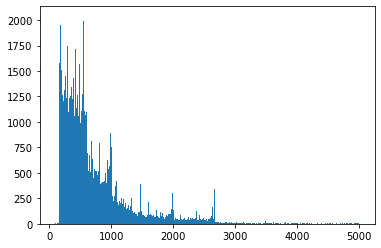

In [304]:
# discretizing the project cost

cost = projFeatures['Project Cost']

plt.hist(cost[cost <= 5000], bins = 500)
plt.show()

In [305]:
# binning the project cost

projCost = pd.DataFrame((projFeatures['Project Cost'] // 500 + 1) * 500).astype('int')

projCost[projCost['Project Cost'] > 3000] = 3000

projCost['Project Cost'] = projCost['Project Cost'].astype('str')
projCost[projCost['Project Cost'] == '3000'] = "3000+"

projFeatures['Project Cost'] = projCost
projFeatures = projFeatures.rename(columns = {"Project Cost": "Project Cost (Up to)"})

print(projFeatures.shape)
projFeatures.sample(5)


(103017, 10)


,Project ID,Project Expiration Date,Project Cost (Up to),Project Type,Project Subject Category Tree,Project Grade Level Category,Project Resource Category,Project Current Status,School Metro Type,School State
1286547,4930e76ea7580fb832d2a6406d803c11,2014-06-09,500,Teacher-Led,"Literacy & Language, Special Needs",Grades 9-12,Supplies,Fully Funded,urban,California
164423,1275d3ea7b885cd67435659bf3ca20d2,2016-07-29,500,Teacher-Led,Literacy & Language,Grades 9-12,Technology,Fully Funded,suburban,California
1129594,d90315c9e3db80e2816df5d3e7170f55,2017-12-02,1000,Teacher-Led,Math & Science,Grades 3-5,Technology,Fully Funded,suburban,California
1737041,c6251ed60814a8eee17950f02576a737,2015-03-12,1000,Teacher-Led,Literacy & Language,Grades PreK-2,Technology,Fully Funded,urban,California
1878794,d92953eca9e9785169e67921db1b89dd,2015-08-01,1500,Teacher-Led,"Math & Science, Applied Learning",Grades 3-5,Technology,Fully Funded,urban,California


In [310]:
# checking to make sure to have no null values or duplicates

trainNullCol = projFeatures.columns[projFeatures.isnull().any()]
projFeatures[trainNullCol].isnull().sum()

projFeatures.shape

(103017, 10)

### One-hot Encoding

In [307]:
enc = OHE(handle_unknown = 'ignore')
enc.fit(projFeatures.iloc[:,2:]) # fit the one hot vector on our dataframe

OneHotEncoder(handle_unknown='ignore')

In [311]:
# convert the one-hot matrix into a dataframe

oneHotMatrix = pd.DataFrame(enc.transform(projFeatures.iloc[:,2:]).toarray())

oneHotMatrix.shape

(103017, 90)

In [309]:
# this is what the OHM looks like
oneHotMatrix.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
92206,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
97321,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
26505,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
22517,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
81421,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


## Merging one-hot matrix with the dataframe

In [312]:
projOHM = pd.concat([projFeatures.reset_index(drop = True), oneHotMatrix.reset_index(drop = True)], axis = 1)

print(projOHM.shape)
projOHM.head(5)

(103017, 100)


,Project ID,Project Expiration Date,Project Cost (Up to),Project Type,Project Subject Category Tree,Project Grade Level Category,Project Resource Category,Project Current Status,School Metro Type,School State,...,80,81,82,83,84,85,86,87,88,89
0,00005454366b6b914f9a8290f18f4aed,2018-07-30,500,Teacher-Led,History & Civics,Grades PreK-2,Books,Fully Funded,suburban,California,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0001037c9aa509b21c47ef94822ae9c1,2015-05-09,500,Teacher-Led,Math & Science,Grades 6-8,Supplies,Fully Funded,urban,California,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,000109232e37607c2de30ac1e103fa22,2018-04-06,500,Teacher-Led,Music & The Arts,Grades 6-8,Musical Instruments,Fully Funded,suburban,California,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,000150db429aff026ecd130b0a076cef,2015-05-08,500,Teacher-Led,"Literacy & Language, History & Civics",Grades 3-5,Books,Fully Funded,urban,California,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0002ca5256e5ebef5082676c6eeba242,2014-08-06,500,Teacher-Led,"Applied Learning, Math & Science",Grades PreK-2,Books,Fully Funded,urban,California,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [37]:
dropCol = ['Project Cost (Up to)', 'Project Type', 'Project Subject Category Tree', 'Project Grade Level Category',
           'Project Resource Category', 'Project Current Status',
           'School Metro Type', 'School State']

In [313]:
projOHM = projOHM.drop(dropCol, axis = 1) # dropping the categorical columns because they have already been vectorized

print(projOHM.shape)
projOHM.head(5)

(103017, 92)


,Project ID,Project Expiration Date,0,1,2,3,4,5,6,7,...,80,81,82,83,84,85,86,87,88,89
0,00005454366b6b914f9a8290f18f4aed,2018-07-30,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0001037c9aa509b21c47ef94822ae9c1,2015-05-09,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,000109232e37607c2de30ac1e103fa22,2018-04-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,000150db429aff026ecd130b0a076cef,2015-05-08,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0002ca5256e5ebef5082676c6eeba242,2014-08-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [39]:
# data dictionary to track the one hot matrix

dataDict = list(enc.get_feature_names(dropCol)) # please note that any new input should strictly should the indexes
                                            # mentioned in data dictionary


## Building the recommendation system

In [315]:
# scale and normalize the dataset

ohmDF = pd.DataFrame(StandardScaler().fit_transform(projOHM.iloc[:,2:]))

ohmDFwProj = pd.concat([projOHM[['Project ID', 'Project Expiration Date']], ohmDF], axis = 1)

ohmDFwProj['Project Expiration Date'] =  pd.to_datetime(ohmDFwProj['Project Expiration Date'])
                                    
print(ohmDFwProj.shape)
ohmDFwProj.head(5) # column here is a OH feature

(103017, 92)


,Project ID,Project Expiration Date,0,1,2,3,4,5,6,7,...,80,81,82,83,84,85,86,87,88,89
0,00005454366b6b914f9a8290f18f4aed,2018-07-30,-0.725179,-0.338581,-0.219446,-0.156246,-0.186257,1.107313,-0.109384,-0.092875,...,-0.057629,-0.410274,0.425467,-0.096373,-0.142916,1.321260,-0.159827,-0.204339,-1.107313,0.0
1,0001037c9aa509b21c47ef94822ae9c1,2015-05-09,-0.725179,-0.338581,-0.219446,-0.156246,-0.186257,1.107313,-0.109384,-0.092875,...,-0.057629,-0.410274,0.425467,-0.096373,-0.142916,-0.756853,-0.159827,-0.204339,0.903087,0.0
2,000109232e37607c2de30ac1e103fa22,2018-04-06,-0.725179,-0.338581,-0.219446,-0.156246,-0.186257,1.107313,-0.109384,-0.092875,...,-0.057629,-0.410274,0.425467,-0.096373,-0.142916,1.321260,-0.159827,-0.204339,-1.107313,0.0
3,000150db429aff026ecd130b0a076cef,2015-05-08,-0.725179,-0.338581,-0.219446,-0.156246,-0.186257,1.107313,-0.109384,-0.092875,...,-0.057629,-0.410274,0.425467,-0.096373,-0.142916,-0.756853,-0.159827,-0.204339,0.903087,0.0
4,0002ca5256e5ebef5082676c6eeba242,2014-08-06,-0.725179,-0.338581,-0.219446,-0.156246,-0.186257,1.107313,-0.109384,-0.092875,...,-0.057629,-0.410274,0.425467,-0.096373,-0.142916,-0.756853,-0.159827,-0.204339,0.903087,0.0


## Testing the recommendation system with a sample row

In [394]:
# this functions returns all the project that the donor has donated to
# input is a donor ID (a string)
# output is an array of all the donated projects

def donatedProjects(main_dataframe, donorID):
    df = main_dataframe[main_dataframe['Donor ID'] == donorID]
    df = df.sort_values(['Donation Received Date']) # sort the donated projects by date (in ascending order)
    df = df.drop_duplicates(subset = ['Project ID']) # remove repetitive donations on the same project
    donatedProjsList = np.array(df['Project ID']) # we only need the donated projects
    
    return donatedProjsList

# test the function here
donatedProjects(donationsTrainFinal, 'd0dc7dcaae4b97cd465ec7b53c86cd6a')

array(['208892af2c863b8328566b26eb818102',
       '33443c7b655ccb3c625382b4b865c4c5',
       'f5a4191e19854948e57f7668037d6701'], dtype=object)

In [395]:
donationsTrainFinal.shape
donationsValidFinal.shape

(99875, 36)

In [396]:
# projectsDF[projectsDF['Project ID'] == 'd0dc7dcaae4b97cd465ec7b53c86cd6a']

In [397]:
# df_final[df_final['Project ID'] == '208892af2c863b8328566b26eb818102']

In [398]:
donationsTrainFinal[donationsTrainFinal['Project ID'] == '208892af2c863b8328566b26eb818102']

,Donor ID,Donation Received Date,Donor City,Donor State,Donor Is Teacher,Donor Zip,Project ID,Donation ID,Donation Included Optional Donation,Donation Amount,...,Project Current Status,Project Fully Funded Date,School Name,School Metro Type,School Percentage Free Lunch,School State,School Zip,School City,School County,School District
1332870,6822ccd2a2be7c4f6646695dc7a044fc,2014-09-29 12:18:30,San Leandro,California,No,945,208892af2c863b8328566b26eb818102,7434dbb0b1bfd1d248f2308d3e122dd9,Yes,50.0,...,Expired,NaN,Bancroft Middle School,urban,67.0,California,94577,San Leandro,Alameda,San Leandro Unified Sch Dist
1332871,d0dc7dcaae4b97cd465ec7b53c86cd6a,2014-12-30 15:54:24,San Leandro,California,No,945,208892af2c863b8328566b26eb818102,37316d492b26e233e9711398afda00ab,Yes,100.0,...,Expired,NaN,Bancroft Middle School,urban,67.0,California,94577,San Leandro,Alameda,San Leandro Unified Sch Dist


In [399]:
ohmDFwProj[ohmDFwProj['Project ID'] == '208892af2c863b8328566b26eb818102']

,Project ID,Project Expiration Date,0,1,2,3,4,5,6,7,...,80,81,82,83,84,85,86,87,88,89
13275,208892af2c863b8328566b26eb818102,2015-01-17,-0.725179,-0.338581,-0.219446,6.400165,-0.186257,-0.903087,-0.109384,-0.092875,...,-0.057629,2.437398,-2.35036,-0.096373,-0.142916,-0.756853,-0.159827,-0.204339,0.903087,0.0


In [400]:
# this function returns the one-hot encoded project features for a given project ID
# input is a project ID
# output is an array of the project features

def projectFeatures(projDF, projectID):
    feat = np.array(projDF[projDF['Project ID'] == projectID]) #projDF is the database of the project featuers
    
    return feat

projectFeatures(ohmDFwProj, '208892af2c863b8328566b26eb818102')

array([['208892af2c863b8328566b26eb818102',
        Timestamp('2015-01-17 00:00:00'), -0.7251785323909844,
        -0.3385811683943249, -0.21944558139179118, 6.4001654764758165,
        -0.18625681813576656, -0.9030866315733332, -0.1093835182932285,
        -0.09287493686008674, 0.14421880802132053, -0.18675839492843938,
        -0.07472271288294247, -0.0639054009529746, -0.16852640749141434,
        -0.11523300303319886, -0.11458257897368315, -0.1293012379748302,
        -0.006231376298711295, 4.567569485152667, -0.03675751505215425,
        -0.015265174267770978, -0.059465540979887065,
        -0.034574629135859264, -0.047406621652944674,
        -0.09513449184031843, -0.003115642781973398,
        -0.14270353564570715, -0.022687948716814562,
        -0.013581958671395026, -0.14298656457030567,
        -0.08500238389595359, -0.08187634527629234, -0.04332428531400542,
        -0.5035254932878972, -0.08060512502950636, -0.0257006075600953,
        -0.13293974520993487, -0.3534607200948

In [401]:
def cosineSimilarity(projDF, obv): #only works for one observation (project) at a time

    project = obv[0][2:] # project features
    project = project.reshape(1,len(project)) # convert 1D to 2D array
    
    projectID = obv[0][0]
    
    
    # getting the cosine similarity between our feature matrix and test sample
    cosSim = cosine_similarity(projDF.iloc[:,2:], project) # ohmDFwProj is the training database here
    recProjects = pd.concat([projDF.iloc[:,:2], pd.DataFrame(cosSim)], axis = 1)
    
    # print(recProjects)
    recProjects = recProjects.sort_values(by = 0, ascending = False) # sorting the similarity in descending order
    top10Rec = list(recProjects.head(11).iloc[1:,0]) # the first column is the project ID
    
    return top10Rec
    

In [405]:
# test_donor = 'e48904f94293f9894afdd59412a12691' # donorsDF['Donor ID'][7]


def getTopRecall(main_dataframe, projectsDF, donorID):
    donated_proj = donatedProjects(main_dataframe, donorID) # all the projects the donor has donated to
                                                            # main dataframe here is either the final training or validation dataframe 
    
    first_donation = donated_proj[0] # first donation of the donor
    
    # print("Donated: ", donated_proj)
    
    proj_features = projectFeatures(projectsDF, first_donation)
    hits = 0
    
    # print(proj_features)

    rec_projs = cosineSimilarity(projectsDF, proj_features) # recommendations based on the first donation

    # print("Recommended: ", rec_projs)

    for i in donated_proj[1:]:
        if i in rec_projs:
            hits += 1

    print(hits)
    # print(hits)
    # return hits


In [408]:
for i in rd.sample(donorsTrainList,20):
    # print(i)
    getTopRecall(donationsTrainFinal, ohmDFwProj, i)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [366]:
donatedProjects('d0dc7dcaae4b97cd465ec7b53c86cd6a')



array(['0d8fce04342fb9fe9c34e35fe474466a',
       '208892af2c863b8328566b26eb818102',
       '33443c7b655ccb3c625382b4b865c4c5',
       'f5a4191e19854948e57f7668037d6701'], dtype=object)

In [369]:
t = projectFeatures(ohmDFwProj, '0d8fce04342fb9fe9c34e35fe474466a')

len(t)
# cosineSimilarity(ohmDFwProj, t)


0

In [133]:
donatedProjsDF = pd.DataFrame.from_dict(donatedProjs, orient='index').reset_index()

donatedProjsDF = donatedProjsDF.rename(columns = {"index" : "Donor ID"})

In [198]:
donatedProjsDF.iloc[:1,:].T.head(11)

,0
Donor ID,cca23670ed0d03bddfcd9c16fa9dacb7
0,05d7c3d0703441e6b16ba5dfdd878c47
1,05d7c3d0703441e6b16ba5dfdd878c47
2,ed707c863b88ae1fcb6ced6235e85583
3,ed707c863b88ae1fcb6ced6235e85583
4,ed707c863b88ae1fcb6ced6235e85583
5,782349164c1592861511bad20984b6ad
6,02be9db395b0028aa4a66230c2f55984
7,1911c650c8ed2f50b837b3ddff411714
8,1c3229ee8fb97b03b946720518c6c0ac


In [137]:
firstProjDonated = donatedProjsDF.iloc[:,:2]
firstProjDonated = firstProjDonated.rename(columns = {0 : "Project ID"})          
firstProjDonated.head(5)


,Donor ID,Project ID
0,cca23670ed0d03bddfcd9c16fa9dacb7,05d7c3d0703441e6b16ba5dfdd878c47
1,8d345d4ded01a6c7f3b79e9686dfe741,4f921539c0a89df04b8a946fc31fb9b2
2,45c45882b12febaf50ea7d25c464c33c,4f921539c0a89df04b8a946fc31fb9b2
3,2ec1193b14119b158c1d3bfd67b2940b,4f921539c0a89df04b8a946fc31fb9b2
4,cc9cf018f0b68657c0ab7891df16c0fe,7045b057d157ea53de41f5207ded655d


In [138]:
firstProjOHM = pd.merge(firstProjDonated, ohmDFwProj, on = 'Project ID', how = 'inner')
firstProjOHM = firstProjOHM.rename(columns = {"Project ID" : "First Donated Project ID"})

firstProjOHM.head(5)

,Donor ID,First Donated Project ID,Project Expiration Date,0,1,2,3,4,5,6,...,80,81,82,83,84,85,86,87,88,89
0,cca23670ed0d03bddfcd9c16fa9dacb7,05d7c3d0703441e6b16ba5dfdd878c47,2013-06-26,-0.725179,2.953502,-0.219446,-0.156246,-0.186257,-0.903087,-0.109384,...,-0.057629,-0.410274,0.425467,-0.096373,-0.142916,1.321260,-0.159827,-0.204339,-1.107313,0.0
1,8d345d4ded01a6c7f3b79e9686dfe741,4f921539c0a89df04b8a946fc31fb9b2,2013-12-28,-0.725179,-0.338581,-0.219446,-0.156246,5.368931,-0.903087,-0.109384,...,-0.057629,-0.410274,0.425467,-0.096373,-0.142916,-0.756853,-0.159827,-0.204339,0.903087,0.0
2,45c45882b12febaf50ea7d25c464c33c,4f921539c0a89df04b8a946fc31fb9b2,2013-12-28,-0.725179,-0.338581,-0.219446,-0.156246,5.368931,-0.903087,-0.109384,...,-0.057629,-0.410274,0.425467,-0.096373,-0.142916,-0.756853,-0.159827,-0.204339,0.903087,0.0
3,2ec1193b14119b158c1d3bfd67b2940b,4f921539c0a89df04b8a946fc31fb9b2,2013-12-28,-0.725179,-0.338581,-0.219446,-0.156246,5.368931,-0.903087,-0.109384,...,-0.057629,-0.410274,0.425467,-0.096373,-0.142916,-0.756853,-0.159827,-0.204339,0.903087,0.0
4,cc9cf018f0b68657c0ab7891df16c0fe,7045b057d157ea53de41f5207ded655d,2013-05-30,-0.725179,-0.338581,-0.219446,-0.156246,-0.186257,1.107313,-0.109384,...,-0.057629,-0.410274,0.425467,-0.096373,-0.142916,-0.756853,-0.159827,-0.204339,0.903087,0.0


In [187]:
rec = cosineSimilarity(firstProjOHM.iloc[:1,1:])

testDonor = donatedProjsDF['Donor ID' == 'cca23670ed0d03bddfcd9c16fa9dacb7']

recProjs = rec.values()

count = 0

for i in rec.values():
    recProjs = i
    for j in recProjs:
        if j in testDonor:
            count += 1
            
print("Our model got %d hits of 10 projects we had recommended." % (count))

Our model got 0 hits of 10 projects we had recommended.


In [83]:
hits = 0
donationCount = []

for i in donor_donated_projs:
    if i not in donationCount: # eliminates repetitive donations to the same recommended project
        donationCount.append(i)
        if i in top10Rec:
            hits += 1
        
        
print("Our model got %d hits out of %d projects that the donor has donated." % (hits, len(donor_donated_projs)))

Our model got 1 hits out of 6 projects that the donor has donated.
